In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df["Quantity"] = df["Quantity"].astype("Int64")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%Y %H:%M')
df["UnitPrice"] = df["UnitPrice"].astype(float)
df["CustomerID"] = df["CustomerID"].astype("Int64")  # Use "Int64" to handle possible NaN values
df["Country"] = df["Country"].astype("category")

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.0,541909,541909.000000,406829.0
mean,9.55225,2011-07-04 13:34:57.156386048,4.611114,15287.69057
min,-80995.0,2010-12-01 08:26:00,-11062.060000,12346.0
25%,1.0,2011-03-28 11:34:00,1.250000,13953.0
50%,3.0,2011-07-19 17:17:00,2.080000,15152.0
75%,10.0,2011-10-19 11:27:00,4.130000,16791.0
max,80995.0,2011-12-09 12:50:00,38970.000000,18287.0
std,218.081158,NaN,96.759853,1713.600303


Need to check quantity for outlier
UnitPrice (Similar to quantity) Need to check for outliers


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description
count,541909,541909,540455
unique,25900,4070,4223
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,2369


InvoiceNo 573585 occurs 1114 times (Might be a big order)

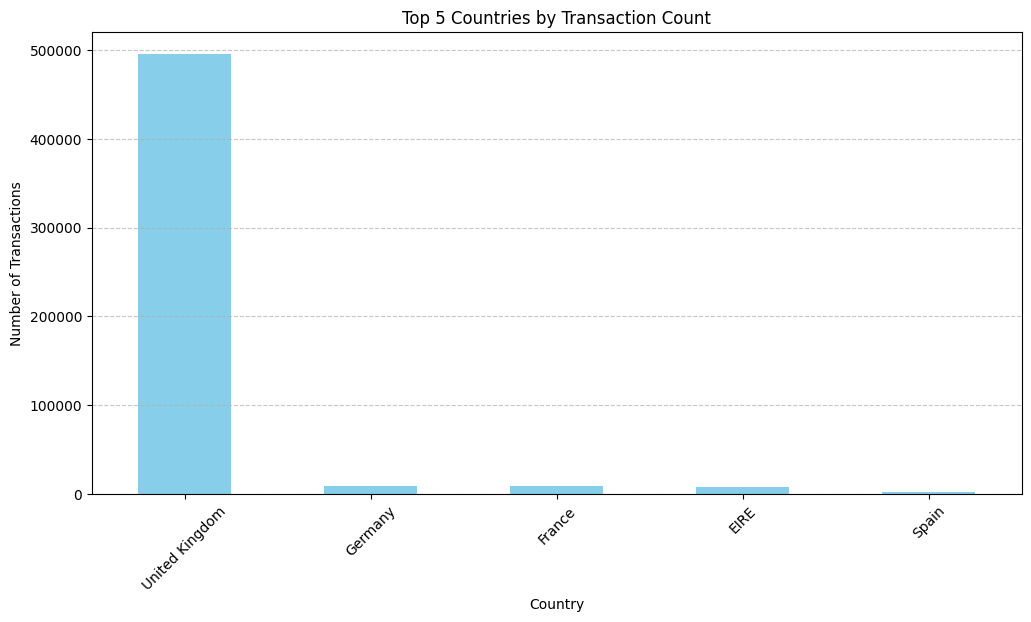

In [ ]:
# Calculate the top 10 countries
top_5_countries = df['Country'].value_counts().head(5)

# Plot the bar chart for top 10 countries
plt.figure(figsize=(12, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
missing_data = df.isnull().sum()
missing_data

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100
missing_percentage

,0
Description,0.268311
CustomerID,24.926694


Removing is better since imputing customer ID might skew the data for clustering

In [ ]:
# Remove rows with missing data
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df_cleaned.shape

(406829, 8)

In [ ]:
# Check for duplicates
duplicates = df_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows (optional)
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Remove duplicates (if desired)
df_no_duplicates = df_cleaned.drop_duplicates()

# Display the shape of the cleaned DataFrame
print(f"Shape after removing duplicates: {df_no_duplicates.shape}")


Number of duplicate rows: 5225
Shape after removing duplicates: (401604, 8)


Create a new column to track cancelled orders. Invoice number starts with 'C'

In [ ]:
df_cleaned['Transaction_Status'] = np.where(df_cleaned['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

<ipython-input-14-e6c01af0b4ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transaction_Status'] = np.where(df_cleaned['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


In [ ]:
cancelled_transactions = df_cleaned[df_cleaned['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8905.0,8905,8905.000000,8905.0
mean,-30.859966,2011-06-27 06:17:46.598540032,18.845519,14991.667266
min,-80995.0,2010-12-01 09:41:00,0.010000,12346.0
25%,-6.0,2011-03-22 16:07:00,1.450000,13510.0
50%,-2.0,2011-07-11 13:51:00,2.950000,14895.0
75%,-1.0,2011-10-06 20:36:00,4.950000,16393.0
max,-1.0,2011-12-09 11:58:00,38970.000000,18282.0
std,1170.154939,NaN,444.366043,1706.772357


In [ ]:
# Finding the number of unique stock codes
unique_stock_codes = df_cleaned['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


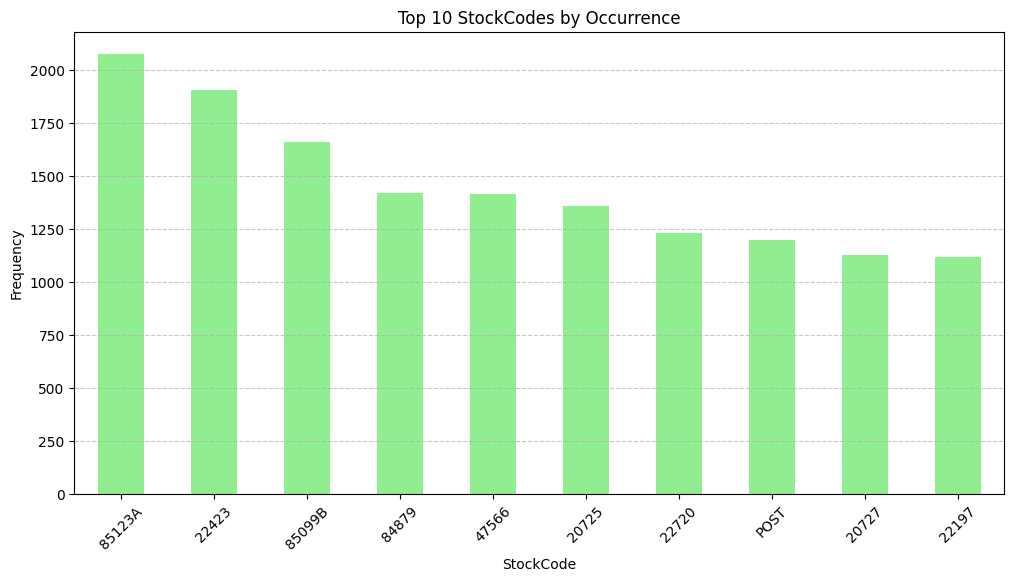

In [ ]:
# Calculate the top 10 StockCodes by their occurrence
top_10_stockcodes = df_cleaned['StockCode'].value_counts().head(10)

# Plot the bar chart for top 10 StockCodes
plt.figure(figsize=(12, 6))
top_10_stockcodes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 StockCodes by Occurrence')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df_cleaned['StockCode'].unique()

# Counting the number of numeric characters in each unique stock code
numeric_char_counts = pd.Series(unique_stock_codes).apply(
    lambda x: sum(char.isdigit() for char in str(x))
).value_counts()

# Displaying the results with improved formatting
print("Numeric Character Frequency in Unique Stock Codes")
print("=" * 50)
print(numeric_char_counts)


Numeric Character Frequency in Unique Stock Codes
5    3676
0       7
1       1
Name: count, dtype: int64


In [ ]:
# Find stock codes with numeric character counts less than 5
codes_with_less_than_5_numeric = pd.Series(unique_stock_codes).loc[
    pd.Series(unique_stock_codes).apply(lambda x: sum(char.isdigit() for char in str(x))) < 5
]

# Display the stock codes with numeric character counts less than 5
codes_with_less_than_5_numeric.tolist()


['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [ ]:
# Calculate the percentage of records with these stock codes
percentage_with_less_than_5_numeric = (
    df_cleaned['StockCode'].isin(codes_with_less_than_5_numeric).sum() / len(df_cleaned)
) * 100

# Print the percentage
print(f"The percentage of records with stock codes having less than 5 numeric characters is: {percentage_with_less_than_5_numeric:.2f}%")

The percentage of records with stock codes having less than 5 numeric characters is: 0.47%


Very less, can be deleted

In [ ]:
# Drop rows with anomalous stock codes
df_cleaned = df_cleaned[~df_cleaned['StockCode'].isin(codes_with_less_than_5_numeric)]

In [ ]:
df_cleaned.shape

(404909, 9)

In [ ]:
df_cleaned['UnitPrice'].describe()


,UnitPrice
count,404909.000000
mean,2.901129
std,4.430846
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


In [ ]:
df_cleaned[df_cleaned['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.0
mean,420.515152
min,1.0
25%,2.0
50%,11.0
75%,36.0
max,12540.0
std,2176.713608


In [ ]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

In [ ]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]



In [ ]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Completed


In [ ]:
# Check unique CustomerID count
unique_customers = df_cleaned['CustomerID'].nunique()
print(f"Number of unique CustomerID: {unique_customers}")


Number of unique CustomerID: 4362


In [ ]:
# Define a reference date (e.g., the last date in the dataset or a specific cutoff date)
reference_date = df_cleaned['InvoiceDate'].max()

# Create a total price column (Quantity * UnitPrice)
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Calculate RFM metrics for each CustomerID
customer_info = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (unique transactions)
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

# Rename columns for clarity
customer_info.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

customer_info

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.0
1,12347,1,7,4310.0
2,12348,74,4,1437.24
3,12349,18,1,1457.55
4,12350,309,1,294.4
...,...,...,...,...
4357,18280,277,1,180.6
4358,18281,180,1,80.82
4359,18282,7,3,176.6
4360,18283,3,16,2088.93


In [ ]:
unique_items_purchased = df_cleaned.groupby('CustomerID').agg({
    'StockCode': 'nunique'  # Count the number of unique products
}).reset_index()

# Rename columns for clarity
unique_items_purchased.columns = ['CustomerID', 'UniqueItemsPurchased']

customer_info = customer_info.merge(unique_items_purchased, on='CustomerID', how='left')

customer_info

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased
0,12346,325,2,0.0,1
1,12347,1,7,4310.0,103
2,12348,74,4,1437.24,21
3,12349,18,1,1457.55,72
4,12350,309,1,294.4,16
...,...,...,...,...,...
4357,18280,277,1,180.6,10
4358,18281,180,1,80.82,7
4359,18282,7,3,176.6,12
4360,18283,3,16,2088.93,262


In [ ]:
# Calculate average days between purchases
average_days_between_purchases = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.sort_values().diff().mean().days) if len(x) > 1 else None
}).reset_index()
average_days_between_purchases.columns = ['CustomerID', 'AvgDaysBetweenPurchases']

# Determine favorite shopping day and hour
favorite_shopping_day_hour = df_cleaned.assign(
    Day=df_cleaned['InvoiceDate'].dt.day_name(),
    Hour=df_cleaned['InvoiceDate'].dt.hour
).groupby('CustomerID').agg({
    'Day': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most common shopping day
    'Hour': lambda x: x.mode()[0] if not x.mode().empty else None  # Most common shopping hour
}).reset_index()
favorite_shopping_day_hour.columns = ['CustomerID', 'FavoriteShoppingDay', 'FavoriteShoppingHour']

# Add average days between purchases
customer_info = customer_info.merge(
    average_days_between_purchases, on='CustomerID', how='left'
)

# Add favorite shopping day and hour
customer_info = customer_info.merge(
    favorite_shopping_day_hour, on='CustomerID', how='left'
)

customer_info


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingDay,FavoriteShoppingHour
0,12346,325,2,0.0,1,0.0,Tuesday,10
1,12347,1,7,4310.0,103,2.0,Tuesday,14
2,12348,74,4,1437.24,21,10.0,Thursday,19
3,12349,18,1,1457.55,72,0.0,Monday,9
4,12350,309,1,294.4,16,0.0,Wednesday,16
...,...,...,...,...,...,...,...,...
4357,18280,277,1,180.6,10,0.0,Monday,9
4358,18281,180,1,80.82,7,0.0,Sunday,10
4359,18282,7,3,176.6,12,9.0,Friday,13
4360,18283,3,16,2088.93,262,0.0,Thursday,14


In [ ]:
df_cleaned['Country'].value_counts(normalize=True).head()


,proportion
Country,
United Kingdom,0.892211
Germany,0.022464
France,0.020174
EIRE,0.018223
Spain,0.006093


In [ ]:
# Group by CustomerID and Country to calculate the number of transactions per country for each customer
customer_country = (
    df_cleaned
    .groupby(['CustomerID', 'Country'])
    .size()
    .reset_index(name='Number_of_Transactions')
)

# Identify the country with the maximum transactions for each customer
customer_main_country = (
    customer_country
    .sort_values('Number_of_Transactions', ascending=False)
    .drop_duplicates('CustomerID')
)

# Add a binary column to indicate if the customer's primary country is the UK
customer_main_country['Is_UK'] = customer_main_country['Country'].eq('United Kingdom').astype(int)

# Merge this information with the customer_info dataframe
customer_info = customer_info.merge(
    customer_main_country[['CustomerID', 'Is_UK']],
    on='CustomerID',
    how='left'
)

# Display the updated customer_info dataframe
customer_info.head()


<ipython-input-33-226713d6f732>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['CustomerID', 'Country'])


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingDay,FavoriteShoppingHour,Is_UK
0,12346,325,2,0.0,1,0.0,Tuesday,10,1
1,12347,1,7,4310.0,103,2.0,Tuesday,14,0
2,12348,74,4,1437.24,21,10.0,Thursday,19,0
3,12349,18,1,1457.55,72,0.0,Monday,9,0
4,12350,309,1,294.4,16,0.0,Wednesday,16,0


In [ ]:
customer_info['Is_UK'].value_counts()


,count
Is_UK,
1,3942
0,420


In [ ]:
# Calculate the total number of transactions for each customer
total_transactions = (
    df_cleaned.groupby('CustomerID')['InvoiceNo']
    .nunique()
    .reset_index(name='Total_Transactions')
)

# Identify and count cancelled transactions for each customer
cancellation_frequency = (
    df_cleaned[df_cleaned['Transaction_Status'] == 'Cancelled']
    .groupby('CustomerID')['InvoiceNo']
    .nunique()
    .reset_index(name='Cancellation_Frequency')
)

# Merge cancellation frequency data into the customer_info dataframe
customer_info = customer_info.merge(cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 for customers with no cancelled transactions
customer_info['Cancellation_Frequency'] = customer_info['Cancellation_Frequency'].fillna(0)

# Calculate the cancellation rate
customer_info['Cancellation_Rate'] = (
    customer_info['Cancellation_Frequency'] / total_transactions['Total_Transactions']
)

# Display the updated customer_data dataframe
customer_info.head()


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingDay,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346,325,2,0.0,1,0.0,Tuesday,10,1,1.0,0.5
1,12347,1,7,4310.0,103,2.0,Tuesday,14,0,0.0,0.0
2,12348,74,4,1437.24,21,10.0,Thursday,19,0,0.0,0.0
3,12349,18,1,1457.55,72,0.0,Monday,9,0,0.0,0.0
4,12350,309,1,294.4,16,0.0,Wednesday,16,0,0.0,0.0


In [ ]:
# Ensure 'Total_Spend' is calculated in df_cleaned
if 'Total_Spend' not in df_cleaned.columns:
    df_cleaned['Total_Spend'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Calculate total spend for each customer
customer_total_spend = (
    df_cleaned.groupby('CustomerID')['Total_Spend']
    .sum()
    .reset_index()
    .rename(columns={'Total_Spend': 'Total_Spend'})
)

# Merge total spend data into customer_info
customer_info = customer_info.merge(customer_total_spend, on='CustomerID', how='left')

# Display the updated customer_info dataframe
customer_info.head()


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingDay,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend
0,12346,325,2,0.0,1,0.0,Tuesday,10,1,1.0,0.5,0.0
1,12347,1,7,4310.0,103,2.0,Tuesday,14,0,0.0,0.0,4310.0
2,12348,74,4,1437.24,21,10.0,Thursday,19,0,0.0,0.0,1437.24
3,12349,18,1,1457.55,72,0.0,Monday,9,0,0.0,0.0,1457.55
4,12350,309,1,294.4,16,0.0,Wednesday,16,0,0.0,0.0,294.4


In [ ]:
from scipy.stats import linregress

# Extract year and month from the InvoiceDate
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = (
    df_cleaned.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend']
    .sum()
    .reset_index()
)

# Compute seasonal buying patterns (mean and standard deviation of monthly spending)
seasonal_patterns = (
    monthly_spending.groupby('CustomerID')['Total_Spend']
    .agg(Monthly_Spending_Mean='mean', Monthly_Spending_Std='std')
    .reset_index()
)

# Replace NaN in Monthly_Spending_Std with 0
seasonal_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Define a function to calculate the spending trend using linear regression
def calculate_trend(spend_series):
    if len(spend_series) > 1:
        x = np.arange(len(spend_series))
        slope, _, _, _, _ = linregress(x, spend_series)
        return slope
    return 0

# Calculate spending trends for each customer
spending_trends = (
    monthly_spending.groupby('CustomerID')['Total_Spend']
    .apply(calculate_trend)
    .reset_index(name='Spending_Trend')
)

# Merge the seasonal patterns and spending trends into the customer_info dataframe
customer_info = customer_info.merge(seasonal_patterns, on='CustomerID', how='left')
customer_info = customer_info.merge(spending_trends, on='CustomerID', how='left')

# Display the updated customer_info dataframe
customer_info.head()


<ipython-input-37-cd9d1cddc9ba>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingDay,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346,325,2,0.0,1,0.0,Tuesday,10,1,1.0,0.5,0.0,0.0,0.0,0.000000
1,12347,1,7,4310.0,103,2.0,Tuesday,14,0,0.0,0.0,4310.0,615.714286,341.070789,4.486071
2,12348,74,4,1437.24,21,10.0,Thursday,19,0,0.0,0.0,1437.24,359.31,203.875689,-100.884000
3,12349,18,1,1457.55,72,0.0,Monday,9,0,0.0,0.0,1457.55,1457.55,0.0,0.000000
4,12350,309,1,294.4,16,0.0,Wednesday,16,0,0.0,0.0,294.4,294.4,0.0,0.000000


In [ ]:
customer_info.describe()

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
count,4362.0,4362.000000,4362.000000,4362.0,4362.000000,4285.000000,4362.000000,4362.000000,4362.000000,4362.000000,4362.0,4362.0,4362.0,4362.000000
mean,15300.241403,91.172627,4.994269,1899.739413,61.184319,3.084714,12.488308,0.903714,0.775562,0.106937,1899.739413,452.466197,187.649491,-25.050168
std,1721.771258,100.965619,9.083107,8266.211342,85.365779,11.399812,2.310852,0.295017,1.964794,0.177426,8266.211342,1004.387821,664.183023,464.972028
min,12346.0,0.000000,1.000000,-1192.2,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,-1192.2,-1192.2,0.0,-24460.900000
25%,13814.25,16.000000,1.000000,294.2925,15.000000,0.000000,11.000000,1.000000,0.000000,0.000000,294.2925,181.39375,0.0,-24.652946
50%,15299.5,49.000000,3.000000,645.685,35.000000,1.000000,12.000000,1.000000,0.000000,0.000000,645.685,305.655,62.764692,0.000000
75%,16777.75,142.000000,5.000000,1596.38,77.000000,3.000000,14.000000,1.000000,1.000000,0.200000,1596.38,482.822292,208.002531,14.382500
max,18287.0,373.000000,242.000000,278778.02,1791.000000,309.000000,20.000000,1.000000,45.000000,1.000000,278778.02,39619.5,19100.986492,2969.151000


In [ ]:
# Define a mapping for days of the week to numbers
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Map the FavoriteShoppingDay column to numeric values
customer_info['FavoriteShoppingDay_Numeric'] = customer_info['FavoriteShoppingDay'].map(day_mapping)

# Drop the original FavoriteShoppingDay column
customer_info.drop(columns=['FavoriteShoppingDay'], inplace=True)

# Rename FavoriteShoppingDay_Numeric to FavoriteShoppingDay
customer_info.rename(columns={'FavoriteShoppingDay_Numeric': 'FavoriteShoppingDay'}, inplace=True)

# Check the result
customer_info.head()



,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,325,2,0.0,1,0.0,10,1,1.0,0.5,0.0,0.0,0.0,0.000000,1
1,12347,1,7,4310.0,103,2.0,14,0,0.0,0.0,4310.0,615.714286,341.070789,4.486071,1
2,12348,74,4,1437.24,21,10.0,19,0,0.0,0.0,1437.24,359.31,203.875689,-100.884000,3
3,12349,18,1,1457.55,72,0.0,9,0,0.0,0.0,1457.55,1457.55,0.0,0.000000,0
4,12350,309,1,294.4,16,0.0,16,0,0.0,0.0,294.4,294.4,0.0,0.000000,2


In [ ]:
customer_info.to_csv('customer_info.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define columns to exclude from scaling
exclude_columns = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# Select numerical columns to scale, excluding the columns in exclude_columns
scale_columns = [
    col for col in customer_info.select_dtypes(include=['float64', 'int64']).columns
    if col not in exclude_columns
]

# Create a copy of the dataset to store scaled values
scaled_customer_info = customer_info.copy()

# Apply the scaler to the selected columns
scaled_customer_info[scale_columns] = scaler.fit_transform(scaled_customer_info[scale_columns])

# Display the first few rows of the scaled dataset
scaled_customer_info.head()


,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2.316176,-0.329690,-0.229846,-0.705098,-0.270625,10,1,0.114243,2.215616,-0.229846,-0.450541,-0.282559,0.053881,-0.852531
1,12347,-0.893205,0.220845,0.291613,0.489897,-0.095163,14,0,-0.394774,-0.602781,0.291613,0.162554,0.231019,0.063530,-0.852531
2,12348,-0.170103,-0.109476,-0.055957,-0.470785,0.606685,19,0,-0.394774,-0.602781,-0.055957,-0.092760,0.024433,-0.163112,0.229757
3,12349,-0.724811,-0.439797,-0.053500,0.126713,-0.270625,9,0,-0.394774,-0.602781,-0.053500,1.000808,-0.282559,0.053881,-1.393674
4,12350,2.157688,-0.439797,-0.194227,-0.529363,-0.270625,16,0,-0.394774,-0.602781,-0.194227,-0.157394,-0.282559,0.053881,-0.311387


In [ ]:
# Check if there are any NaN values in the dataframe
nan_exists = scaled_customer_info.isnull().values.any()
print(f"Does scaled_customer_info contain NaN values? {nan_exists}")


Does scaled_customer_info contain NaN values? True


In [ ]:
# Count the total number of NaN values in the dataframe
total_nan = scaled_customer_info.isnull().sum().sum()
print(f"Total number of NaN values: {total_nan}")


Total number of NaN values: 77


In [ ]:
# Drop rows with NaN values
scaled_customer_info = scaled_customer_info.dropna()

# Verify that NaN values are removed
print(f"Total number of NaN values after dropping: {scaled_customer_info.isnull().sum().sum()}")

Total number of NaN values after dropping: 0


In [ ]:
scaled_customer_info.to_csv('scaled_customer_info.csv', index=False)